# Examples

## Line search

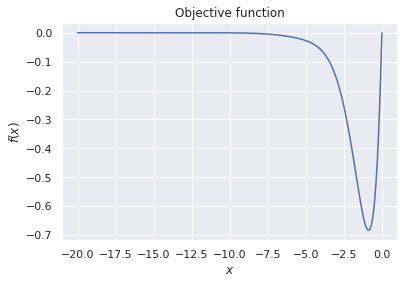

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
def f_2(x):
    return (x + np.sin(x))*np.exp(x)
x = np.linspace(-20,0, 200)
plt.plot(x, f_2(x))
plt.title('Objective function')
plt.xlabel(f'$x$')
plt.ylabel(f'$f(x)$')
plt.show()

In [ ]:
def line_search(t, left=-20, right=0, it=5):
    a = left
    b = right
    c = a + t * (b - a)
    f_c = f_2(c)
    k = 0
    while b-a >= 1e-7:
        y = a + t * (c - a)
        f_y = f_2(y)
        if f_y <= f_c:
            f_c = f_y
            b = c
            c = y
        else:
            z = c + t * (b - c)
            f_z = f_2(z)
            if f_c <= f_z:
                a = y
                b = z
            else:
                a = c
                c = z
                f_c = f_z
        k += 1
    return k

In [ ]:
line_search_vect = np.vectorize(line_search)
T = np.linspace(1e-2, 1-1e-2, 2000)
N_T = line_search_vect(T)

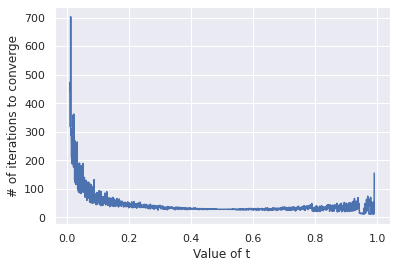

In [ ]:
plt.plot(T, N_T)
plt.ylabel('# of iterations to converge')
plt.xlabel('Value of t')
plt.show()

## Gradient descent

Consider the function from two variables:

$$
f(x_1, x_2) = x_1^2 + kx_2^2,
$$

where $k$ is a parameter. It is clearly quadratic function $f(x) = x^\top A x$, where the matrix $A = \begin{pmatrix}
1 & 0\\
0 & k
\end{pmatrix}$.

In [ ]:
def f(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    
    x_1, x_2 = x
    return x_1**2 + k*x_2**2

def df(x, *f_params):
    if len(f_params) == 0:
        k = 2
    else:
        k = float(f_params[0])
    return np.array([2*x[0], 2*k*x[1]])

Постройте график количества итераций, необходимых для сходимости алгоритма наискорейшего спуска (до выполнения условия $\|\nabla f(x_k)\| \leq \varepsilon = 10^{-7}$) в зависимости от значения $k$. Рассмотрите интервал $[10^{-3}; 10^{3}]$ (будет удобно использовать функцию `ks = np.logspace(-3,3))` и строить график по оси абсцисс в логарифмическом масштабе `plt.semilogx()` или `plt.loglog()` для двойного лог. масштаба.

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from matplotlib import pyplot as plt

def plot_3d_function(x1, x2, f, title, *f_params, minima = None, iterations = None):
    '''
    '''
    low_lim_1 = x1.min()
    low_lim_2 = x2.min()
    up_lim_1 = x1.max()
    up_lim_2 = x2.max()
    X1,X2 = np.meshgrid(x1, x2) # grid of point
    Z = f((X1, X2), *f_params) # evaluation of the function on the grid

    # set up a figure twice as wide as it is tall
    fig = plt.figure(figsize=(16,7))
    fig.suptitle(title)
    #===============
    # First subplot
    #===============
    # set up the axes for the first plot
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    # plot a 3D surface like in the example mplot3d/surface3d_demo
    surf = ax.plot_surface(X1, X2, Z, rstride=1, cstride=1,
    cmap=cm.RdBu,linewidth=0, antialiased=False)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, f(minima_), 'r*', markersize=10)


    #===============
    # Second subplot
    #===============
    # set up the axes for the second plot
    ax = fig.add_subplot(1, 2, 2)
    # plot a 3D wireframe like in the example mplot3d/wire3d_demo
    im = ax.imshow(Z,cmap=plt.cm.RdBu, extent=[low_lim_1, up_lim_1, low_lim_2, up_lim_2])
    cset = ax.contour(x1, x2,Z,linewidths=2,cmap=plt.cm.Set2)
    ax.clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
    fig.colorbar(im)
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')

    if minima is not None:
        minima_ = np.array(minima).reshape(-1, 1)
        ax.plot(*minima_, 'r*', markersize=10)

    if iterations is not None:
        for point in iterations:
            ax.plot(*point, 'go', markersize=3)
        iterations = np.array(iterations).T
        ax.quiver(iterations[0,:-1], iterations[1,:-1], iterations[0,1:]-iterations[0,:-1], iterations[1,1:]-iterations[1,:-1], scale_units='xy', angles='xy', scale=1, color='blue')
    plt.show()


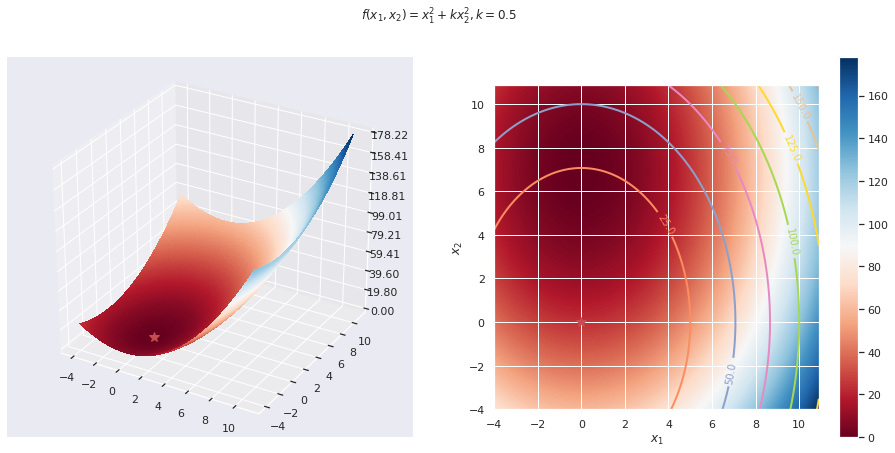

In [ ]:
up_lim = 11
low_lim = -4
x1 = np.arange(low_lim, up_lim, 0.1)
x2 = np.arange(low_lim, up_lim, 0.1)
k=0.5
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'
plot_3d_function(x1, x2, f, title, k, minima=[0,0])

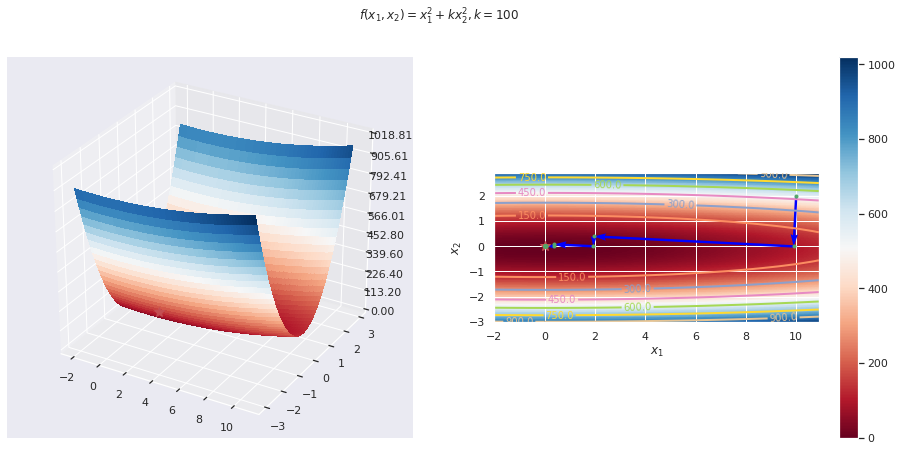

In [ ]:
from scipy.optimize import minimize_scalar
def steepest_descent(x_0, f, df, *f_params, df_eps = 1e-2, max_iter = 1000):
    iterations = []
    x = np.array(x_0)
    iterations.append(x)
    while np.linalg.norm(df(x, *f_params)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x, *f_params), *f_params))
        alpha_opt = res.x
        x = x - alpha_opt * df(x, *f_params)
        iterations.append(x)
    #print('Finished with', len(iterations), 'iterations')
    return iterations
x_0 = [10,2]
k = 100
iterations = steepest_descent(x_0, f, df, k, df_eps = 1e-7)
title = f'$f(x_1, x_2) = x_1^2 + k x_2^2, k = {k}$'
x1 = np.arange(-2, 11, 0.1)
x2 = np.arange(-3, 3, 0.1)
plot_3d_function(x1, x2, f, title, k, minima=[0,0], iterations = iterations)


In [ ]:
from functools import partial
ks1= np.logspace(-3, 5, 300)
x_0 = [-0.5, -3]

def my_steepest_descent(k, x_0, f, df, df_eps = 1e-7, max_iter = 1000):
    iterations = np.array(x_0)
    x = x_0
    while np.linalg.norm(df(x, k)) > df_eps and len(iterations) <= max_iter:
        res = minimize_scalar(lambda alpha: f(x - alpha * df(x, k), k))
        alpha_opt = res.x
        x = x - alpha_opt * df(x, k)
        iterations = np.vstack((iterations, x))
    return iterations.shape[0], f(iterations[-1])

partial_descent1 = partial(my_steepest_descent, x_0=x_0, f=f, df=df)



iter_count1 = []
for k in ks1:
    num_iter, x_f = partial_descent1(k)
    if np.linalg.norm(x_f) > 1e-3:
        print(f"No convergence at level of 1e-3 on parameter k = {k}")
    iter_count1.append(num_iter)

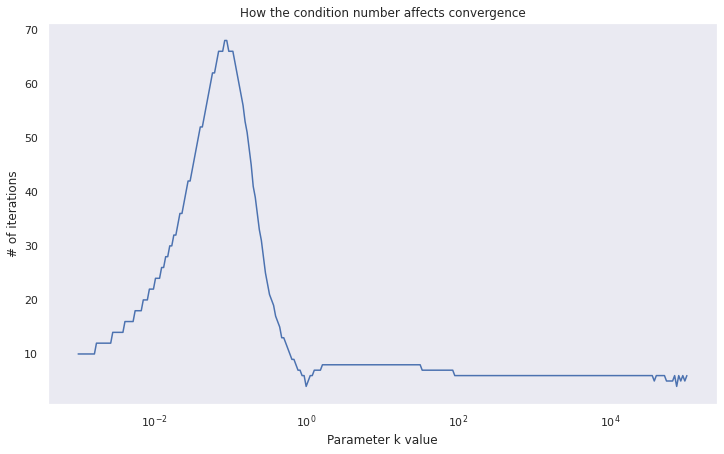

In [ ]:
plt.figure(figsize = (12, 7))
plt.semilogx(ks1, iter_count1)
plt.xlabel("Parameter k value")
plt.ylabel("# of iterations")
plt.grid(which = 'both')
plt.title('How the condition number affects convergence')
plt.show()

## Least squares with $l_1$ regularization

$$
\min_{x \in \mathbb{R^n}} \dfrac{1}{2}\|Ax - b\|_2^2 + \lambda \|x\|_1
$$

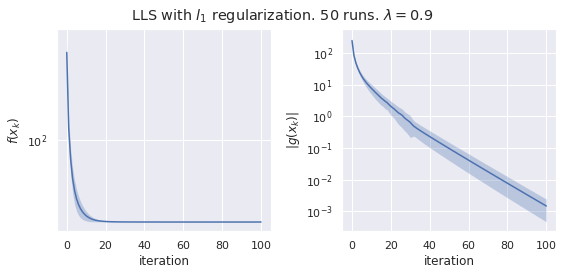

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
np.random.seed(1)

# PARAMETERS
m = 50
n = 20
n_iter = 100
n_exp = 50
lam = 0.9
alpha = 0.01

f_vals_array = np.zeros((n_exp, n_iter+1))
g_norm_array = np.zeros((n_exp, n_iter+1))


def f(x, *f_params):
    A, b, lam = f_params
    return 0.5*np.linalg.norm(A@x - b, ord=2)**2 + lam*np.linalg.norm(x, ord=1)

def g(x, *f_params):
    A, b, lam = f_params
    return A.T@(A@x - b) + lam*np.sign(x)

def subgradient_descent(x_0, f, g, *f_params, alpha=0.001, n_iter=100):
    iterations = []
    f_vals     = []
    x          = np.array(x_0)
    iterations.append(x)
    f_vals.append(f(x, *f_params))
    for i_iter in range(n_iter):
        x = x - alpha * g(x, *f_params)
        iterations.append(x)
        f_vals.append(f(x, *f_params))
#     print(f'Finished with {len(iterations)} iterations and final value {f_vals[-1]}')
    return iterations, f_vals

A = np.random.randn(m, n)
b = np.random.randn(m)
for exp in range(n_exp):
    x_0 = np.random.randn(n)
    xs, f_vals_array[exp, :] = subgradient_descent(x_0, f, g, A, b, lam, alpha=alpha, n_iter = n_iter)
    g_norm_array[exp, :] = np.array([np.linalg.norm(g(x, A, b, lam)) for x in xs])
    
fig = plt.figure(figsize=(8,4))
fig.suptitle(f'LLS with $l_1$ regularization. {n_exp} runs. $\lambda = {lam}$')

ax = fig.add_subplot(1, 2, 1)
ax.set_ylabel(f'$f(x_k)$')
ax.set_xlabel('iteration')
ax.semilogy(f_vals_array.mean(axis=0)) 
ax.fill_between(np.arange(n_iter+1), f_vals_array.mean(axis=0) - f_vals_array.std(axis=0),  f_vals_array.mean(axis=0) + f_vals_array.std(axis=0), alpha=0.3)

ax = fig.add_subplot(1, 2, 2)
ax.set_ylabel(f'$\|g(x_k)\|$')
ax.set_xlabel('iteration')
ax.semilogy(g_norm_array.mean(axis=0)) 
ax.fill_between(np.arange(n_iter+1), g_norm_array.mean(axis=0) - g_norm_array.std(axis=0),  g_norm_array.mean(axis=0) + g_norm_array.std(axis=0), alpha=0.3)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('SD.svg')
# plt.show()


# Exercices

## Task 1: [Hobbit village](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

In [ ]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import copy
sns.set()

Below one can find function plotting the village

In [ ]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

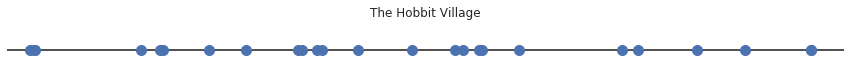

In [ ]:
N = 25
l = 1
x = np.random.rand(N)*l
    
plot_village(x, l)

The inhabitants of a one-dimensional village want to connect to the Internet, so they need a central service station from which a cable will stretch to all the houses in the village. Let the price of the cable to be pulled from the station to each house independently be determined by some function p(d) . Then it is clear that the village will have to pay the following amount for access to the World Wide Web:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
$w$ - station location, $x_i$ - location of $i$ house.

Write analytical solution $w^*$ for minimization $P(w,x)$, if $p(d) = d^2$

<font color="lime"> ==YOUR ANSWER== </font>

Write loss function $P(x,w)$

In [ ]:
def P(w, x):
    pass

Plot loss function on the range $(0, l)$

In [ ]:
### YOUR CODE

Write gradient of loss function

In [ ]:
def dP(w, x):
    pass

Plot gradient of loss function on the range $(0,l)$. Which point on the graph is of particular interest? Why?

In [ ]:
### YOUR CODE

Write function `gradient_descent`, which returns $w_k$ after a fixed number of steps.   

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [ ]:
def gradient_descent(x, dP, w0, mu, Nsteps):
    pass

Modify `gradient_descent` to return all optimization trajectory.
Plot loss function trajectory for initial point $w_0 = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$.   
Draw conclusions.

In [ ]:
def gradient_descent(x, dP, w0, mu, Nsteps):
    pass

The village decided to lay cable using new technology. That's why the price of the cable changed to:

$$
p(d) = |d|
$$

Write new function `P`, `dP`. Plot graphs for various $x$ and $w$.

In [ ]:
def P(w, x):
    pass
    
def dP(w, x):
    pass

Write new analytical solytion $w^*$

<font color="lime"> ==YOUR ANSWER== </font>

Plot loss trajectory for new $p(d)$.

In [ ]:
### YOUR CODE

After several years, the goverment propose to destroy the first station but choose locations for two new stations. In this conditions cost of connecting all house calculated by new formula:

$$
P(w_1, w_2, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p\left(\min\left(\left|w_1 - x_i\right|, \left|w_2 - x_i\right|\right)\right)
$$

Write new `P`, `dP`. 

In [ ]:
def P(w1, w2, x):
    pass

def dP(w1, w2, x):
    pass

Plot  $P(w_1, w_2), \nabla P(w_1, w_2)$ for different number of houses $N$. Comment on what happens as you increase $N$.

In [ ]:
### YOUR CODE

Write new `gradient_descent`, which returns the entire optimization trajectory $(w_k)$ after a fixed number of steps and draws the process on the graphs $P$ and $\nabla P$ that were above. To ease visualization try to use `ax.quiver`

In [ ]:
def gradient_descent(x, dP, w0, mu, Nsteps):
    pass

In [ ]:
### YOUR CODE

Construction is almost underway, but new safety regulations do not allow stations to be on the distance less than 1/2:

$$
\left|w_1 - w_2\right| \leq \dfrac{l}{2}
$$

Plot our feasible set. Is it convex?

In [ ]:
### YOUR CODE

Write `conditional_SGD`, which returns the entire optimization trajectory $(w_k)$ after a fixed number of steps and draws the process on the graphs $P$ and $\nabla P$ that were above.

The conditional gradient descent method consists in making a gradient step and then checking if the obtained point belongs to the feasible set. If it belongs to the target set, the algorithm continues, otherwise a projection to the feasible set is made.

In [ ]:
def conditional_SGD(x, dP_sigma, w0, mu, Nsteps, p=0.4):
    pass

In [ ]:
def projection(w):
    pass

In [ ]:
### YOUR CODE

## Task 2

Find $\partial f(x)$, if $$f(x) = \text{ReLU}(x) = \max \{0, x\}$$

<font color="lime"> ==YOUR ANSWER== </font>

Find $\partial f(x)$, if:

$$
f(x)=\left|x-5\right|+2\left|10-x\right|\ +\ 5\left|x-9\right|
$$

<font color="lime"> ==YOUR ANSWER== </font>